In [1]:
import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import set_option
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline 

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import performance metrics/measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# from imblearn.under_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [2]:
SHOW_FIGURE = False
RANDOM_STATE = 42
FEATURE_SELECTION = False
APPLY_PCA = False
APPLY_OVERSAMPLING = False

In [3]:
df_original = pd.read_csv('../data/card_client.csv', sep=";")

In [4]:
df_original.rename(columns={"default payment next month": "Default"}, inplace=True)
df_original["Default"] = df_original["Default"].astype('category')
df_original.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [6]:
df_original.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>],
       [<AxesSubplot:title={'center':'AGE'}>, <AxesSubplot:>]],
      dtype=object)

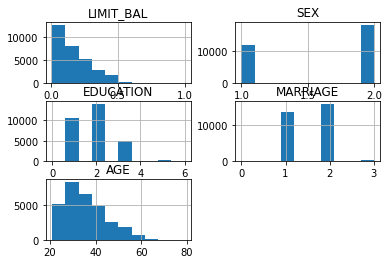

In [7]:
column = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]
df_original[["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]].hist()

In [8]:
''' QUEM USA MAIS O CARTAO? 
    R: PESSOAS NA FAIXA DE 30 ANOS COM A ESCOLARIDADE 2 (UNIVERSITARY) DO SEXO FEMININO E SOLTEIRAS COM UM LIMITE DE 0 A 2 

'''

' QUEM USA MAIS O CARTAO? \n    R: PESSOAS NA FAIXA DE 30 ANOS COM A ESCOLARIDADE 2 (UNIVERSITARY) DO SEXO FEMININO E SOLTEIRAS COM UM LIMITE DE 0 A 2 \n\n'

In [9]:
column = ["ID","LIMIT_BAL","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
pay_mon = ["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

In [10]:
df_ = (
    df_original
    .copy()
    .assign(
        NOT_PAY = df_original["PAY_1"] + df_original["PAY_2"] + df_original["PAY_3"] + df_original["PAY_4"] + df_original["PAY_5"] + df_original["PAY_6"]
    )
)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'PAY_1'}>],
       [<AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>, <AxesSubplot:>]],
      dtype=object)

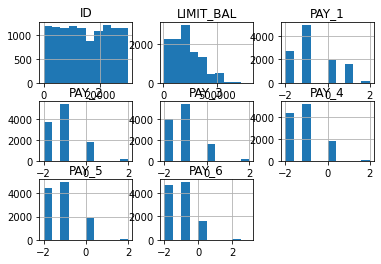

In [11]:
df_.query("NOT_PAY < -1")[column].hist()

In [12]:
'''
    QUAANTAS PESSOAS FICARAM COM DIVIDAS ATE O PROXIMO ANO E QUAL O VALOR LIMITE DESTAS PESSOAS QUE FICARAM COM DIVIDAS?
    R: AS PESSOAS QUE MAIS DEVEM SAO AS QUE POSSUEM UM LIMITE 25000 COM UM GRAU DE ESCOLARIDADE DE 1(GRADUETED SCHOOL) DO SEXO
    FEMININO PODENDO SER SOLTEIRO OU CASADO.
    
'''

'\n    QUAANTAS PESSOAS FICARAM COM DIVIDAS ATE O PROXIMO ANO E QUAL O VALOR LIMITE DESTAS PESSOAS QUE FICARAM COM DIVIDAS?\n    R: AS PESSOAS QUE MAIS DEVEM SAO AS QUE POSSUEM UM LIMITE 25000 COM UM GRAU DE ESCOLARIDADE DE 1(GRADUETED SCHOOL) DO SEXO\n    FEMININO PODENDO SER SOLTEIRO OU CASADO.\n    \n'

In [13]:
column = ["ID", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
df_[column]

,ID,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,1,3913,3102,689,0,0,0
1,2,2682,1725,2682,3272,3455,3261
2,3,29239,14027,13559,14331,14948,15549
3,4,46990,48233,49291,28314,28959,29547
4,5,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...,...
29995,29996,188948,192815,208365,88004,31237,15980
29996,29997,1683,1828,3502,8979,5190,0
29997,29998,3565,3356,2758,20878,20582,19357
29998,29999,-1645,78379,76304,52774,11855,48944


ID              AxesSubplot(0.125,0.125;0.0945122x0.755)
BILL_AMT1    AxesSubplot(0.238415,0.125;0.0945122x0.755)
BILL_AMT2    AxesSubplot(0.351829,0.125;0.0945122x0.755)
BILL_AMT3    AxesSubplot(0.465244,0.125;0.0945122x0.755)
BILL_AMT4    AxesSubplot(0.578659,0.125;0.0945122x0.755)
BILL_AMT5    AxesSubplot(0.692073,0.125;0.0945122x0.755)
BILL_AMT6    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

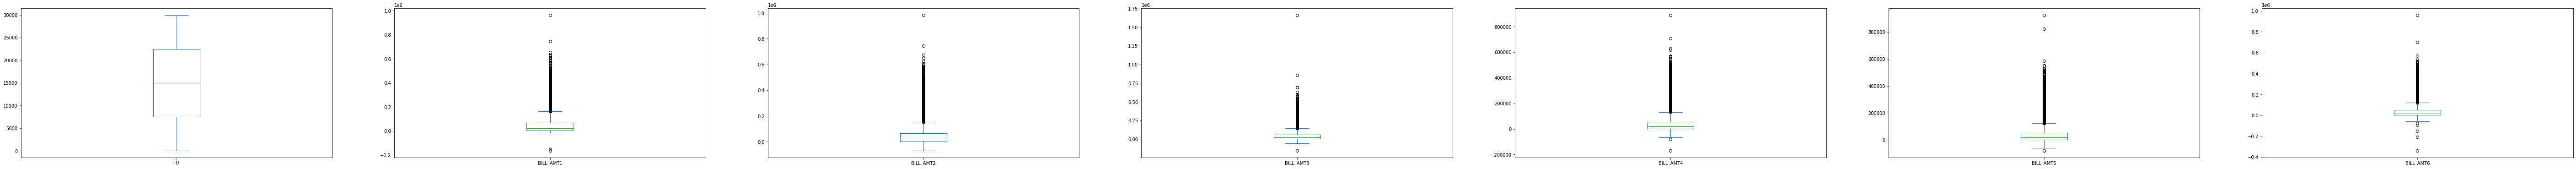

In [14]:
df_[column].plot(kind="box", figsize=(100,6), subplots=True)

BILL_AMT1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

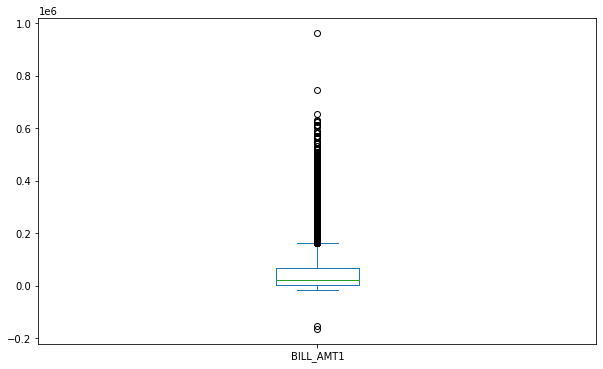

In [15]:
df_["BILL_AMT1"].plot(kind="box", figsize=(10,6), subplots=True)

In [16]:
df_[df_["BILL_AMT1"] >= 700000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,NOT_PAY
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,927171,961664,50784,50723,896040,50000,50000,50256,0,-1
27557,27558,730000,1,3,1,56,0,0,0,0,...,66111,38491,20500,16500,3000,2000,2000,5000,0,0


BILL_AMT2    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

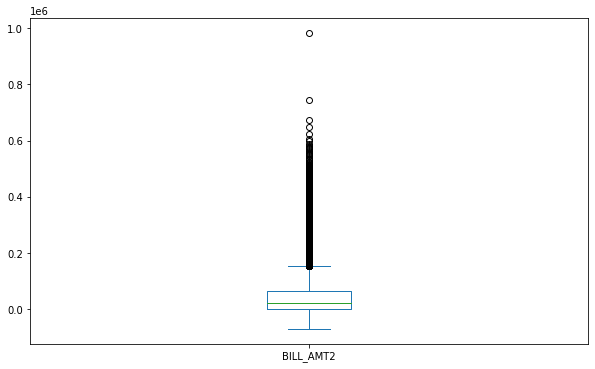

In [17]:
df_["BILL_AMT2"].plot(kind="box", figsize=(10,6), subplots=True)

In [18]:
df_[df_["BILL_AMT2"] >= 700000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,NOT_PAY
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,927171,961664,50784,50723,896040,50000,50000,50256,0,-1
19748,19749,440000,2,2,2,39,0,0,0,0,...,364175,376228,18174,20341,13005,15410,72000,14500,0,0


BILL_AMT3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

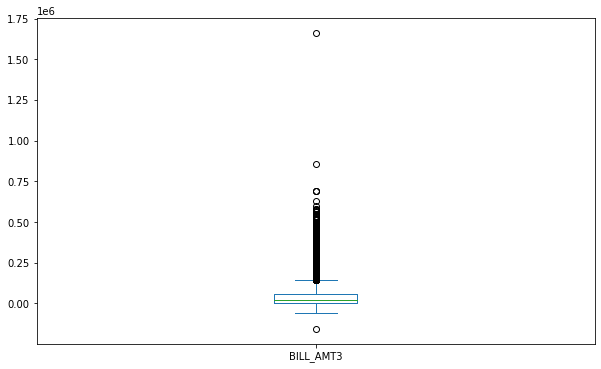

In [19]:
df_["BILL_AMT3"].plot(kind="box", figsize=(10,6), subplots=True)

In [20]:
df_[df_["BILL_AMT3"] >= 1000000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,NOT_PAY
5296,5297,500000,2,1,1,33,-2,-2,-1,-1,...,97115,377217,4366,1684259,121831,97670,379267,26759,0,-9


BILL_AMT4    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

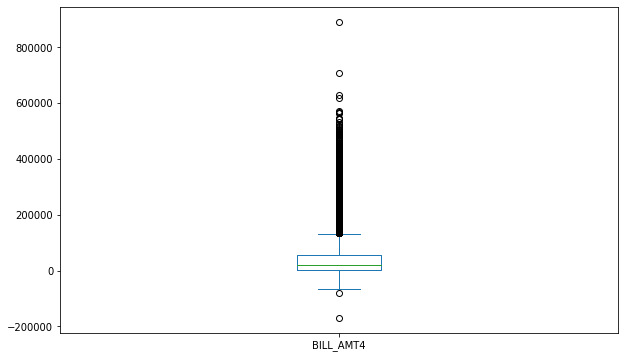

In [21]:
df_["BILL_AMT4"].plot(kind="box", figsize=(10,6), subplots=True)

In [22]:
df_[df_["BILL_AMT4"] >= 600000] 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,NOT_PAY
40,41,360000,1,1,2,33,0,0,0,0,...,195969,179224,10000,7000,6000,188840,28000,4000,0,0
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,927171,961664,50784,50723,896040,50000,50000,50256,0,-1
24118,24119,500000,1,1,2,27,0,0,0,0,...,250600,296217,30032,271636,30876,60044,50539,100562,0,0
26547,26548,520000,2,3,1,54,0,0,0,0,...,383160,294641,28500,30500,30000,15000,15000,0,0,0


BILL_AMT5    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

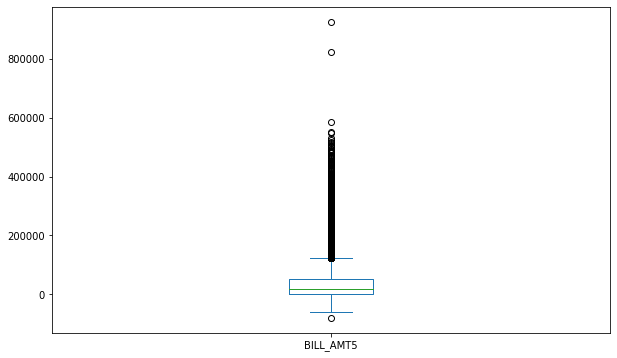

In [23]:
df_["BILL_AMT5"].plot(kind="box", figsize=(10,6), subplots=True)

In [24]:
df_[df_["BILL_AMT5"] >= 600000] 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,NOT_PAY
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,927171,961664,50784,50723,896040,50000,50000,50256,0,-1
20892,20893,550000,1,1,2,35,2,2,2,2,...,823540,501370,23000,23000,18000,0,18373,18159,0,10


BILL_AMT6    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

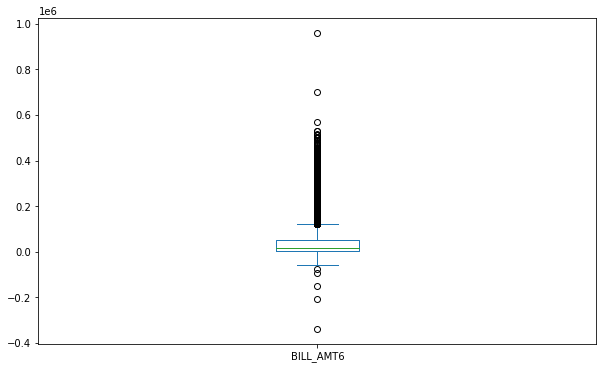

In [25]:
df_["BILL_AMT6"].plot(kind="box", figsize=(10,6), subplots=True)

In [26]:
df_[df_["BILL_AMT6"] >= 600000] 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,NOT_PAY
1508,1509,480000,1,3,2,53,0,0,0,0,...,369920,699944,18093,15233,12597,15098,14155,20306,0,0
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,927171,961664,50784,50723,896040,50000,50000,50256,0,-1


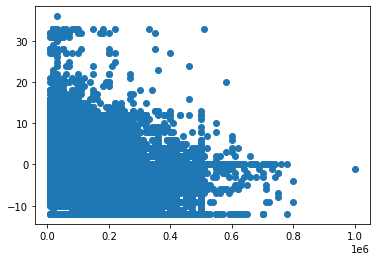

In [27]:
plt.scatter(data= df_, x="LIMIT_BAL", y="NOT_PAY")

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>],
       [<AxesSubplot:title={'center':'AGE'}>, <AxesSubplot:>]],
      dtype=object)

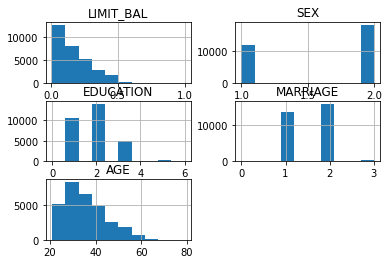

In [28]:
column = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]
df_original[column].hist()

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>]], dtype=object)

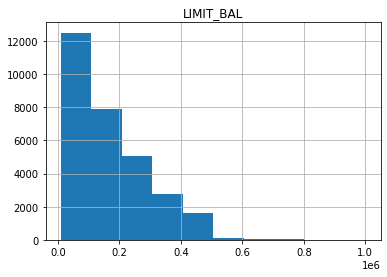

In [29]:
df_original[["LIMIT_BAL","Default"]].hist()

<AxesSubplot:xlabel='EDUCATION', ylabel='Default'>

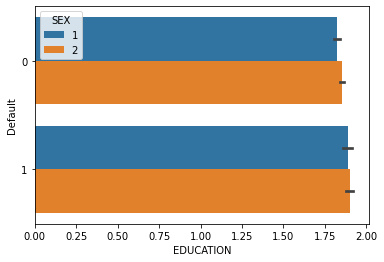

In [30]:
sns.barplot(data=df_original, x="EDUCATION", y="Default", hue="SEX")

<AxesSubplot:xlabel='AGE', ylabel='Default'>

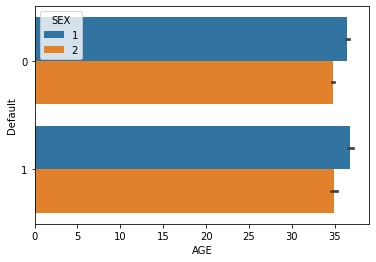

In [31]:
sns.barplot(data=df_original, x="AGE", y="Default", hue="SEX")

<AxesSubplot:xlabel='MARRIAGE', ylabel='Default'>

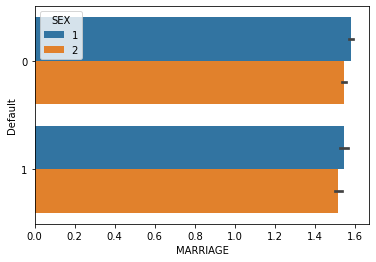

In [32]:
sns.barplot(data=df_original, x="MARRIAGE", y="Default", hue="SEX")

In [33]:
if SHOW_FIGURE :
    # HISTOGRAMS PLOTS FOR FEATURES IMPORTANCE
    fig, axes= plt.subplots(6,4, figsize=(12,12))
    non_def = data[data.Default==0]
    default = data[data.Default==1]
    ax = axes.ravel()

    for i,label in enumerate(data.columns[:-1]):
        _,bins = np.histogram(data[label],bins=100)
        ax[i].hist(non_def[label],bins=bins,color='r',alpha=.5)# red color for malignant class
        ax[i].hist(default[label],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region
        ax[i].set_title(data.columns[i],fontsize=9)
        ax[i].axes.get_xaxis().set_visible(True) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
        ax[i].set_yticks(())


    ax[0].legend(['Non Default','Default'],loc='best',fontsize=8)
    plt.tight_layout() # let's make good plots
    #plt.show()

C:\Users\luiz.torres\AppData\Local\Temp\ipykernel_15272\4062982141.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


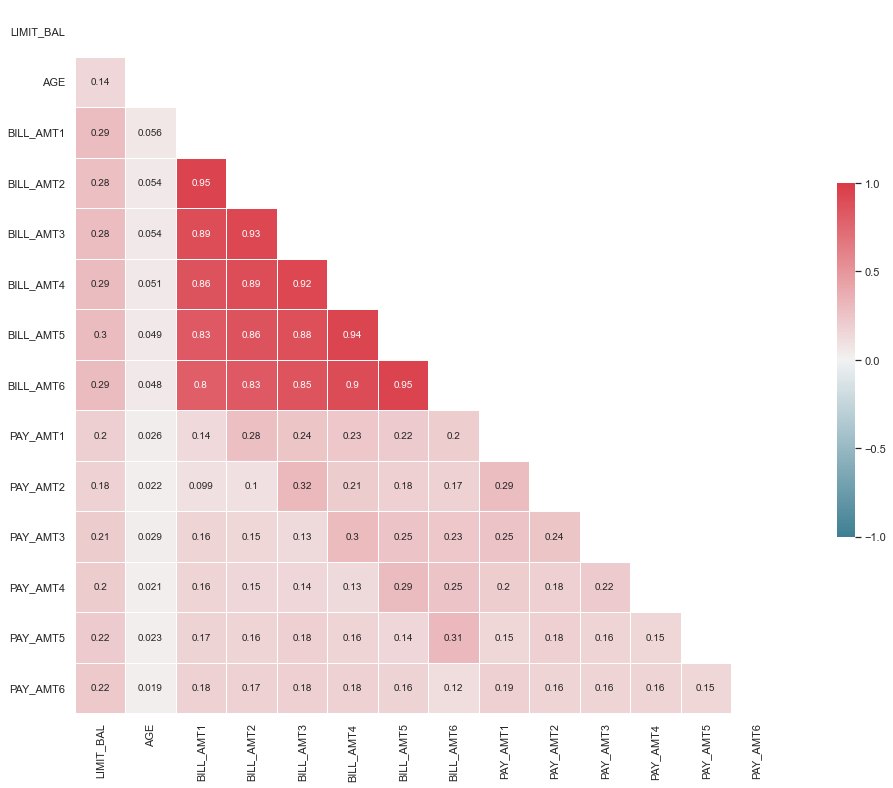

In [34]:
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = df_original[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=10)
# plt.show()
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

In [35]:
# HA UMA CORRELACAO ENTRE TODAS AS COLUNAS BILL

In [36]:
import matplotlib.patches as mpatches

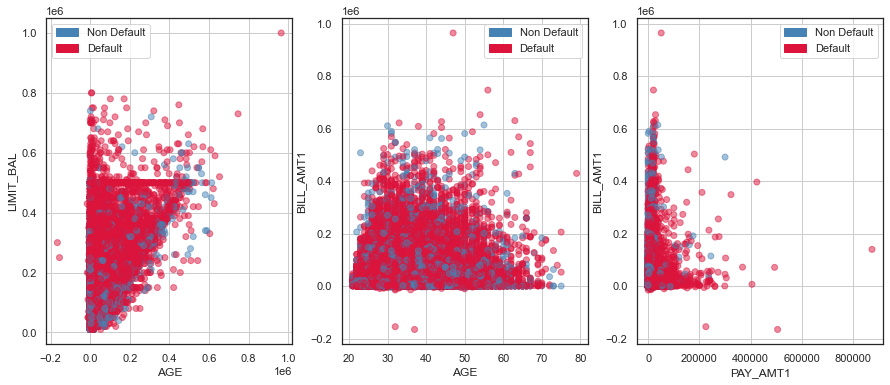

In [37]:
data_np = df_original.to_numpy()
target = df_original.Default

BILL_AMT1 = df_original["BILL_AMT1"].to_numpy()
BILL_AMT2 = df_original["BILL_AMT2"].to_numpy()
BILL_AMT3 = df_original["BILL_AMT3"].to_numpy()
BILL_AMT4 = df_original["BILL_AMT4"].to_numpy()
BILL_AMT5 = df_original["BILL_AMT5"].to_numpy()
BILL_AMT6 = df_original["BILL_AMT6"].to_numpy()
AGE = df_original["AGE"].to_numpy()
LIMIT_BAL = df_original["LIMIT_BAL"].to_numpy()
PAY_AMT1 = df_original["PAY_AMT1"].to_numpy()

fig, ax = plt.subplots(1,3, figsize=(15,6))

labels = ["Non Default", "Default"]
pop_a = mpatches.Patch(color="steelblue", label="Non Default")
pop_b = mpatches.Patch(color="crimson", label="Default")
colors = ["crimson", "steelblue"]

ax[0].scatter(BILL_AMT1, LIMIT_BAL, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel("AGE")
ax[0].set_ylabel("LIMIT_BAL")
ax[0].legend(handles=[pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[1].grid()
ax[1].set_xlabel("AGE")
ax[1].set_ylabel("BILL_AMT1")
ax[1].legend(handles=[pop_a,pop_b])

ax[2].scatter(PAY_AMT1, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[2].grid()
ax[2].set_xlabel("PAY_AMT1")
ax[2].set_ylabel("BILL_AMT1")
ax[2].legend(handles=[pop_a,pop_b])

In [38]:
# NO PRIMEIRO GRAFICO PERCEBE-SE QUE HOUVE UMA QUANTIDADE DE CONSTANTE DE PESSOAS COM O MESMO LIMITE COMO MOSTRA NA CONCENTRACAO ENTRE 0.A E 0.6 PODENDO ENTENDER QUE AS PESSOAS
# QUE ESTAO NESTAS AREAS SAO CLIENTES A MAIS TEMPO

#NA SEGUNDA TABELA MOSTRA QUE O NUMERO DE PESSOAS QUE UTILIZAM O CARTAO ESTAO ENTRE 30 A 40 ANOS DE IDADE

#NA TERCEIRA MOSTRA QUE A MAIORIA DAS PESSOAS QUE NAO LEVARAM A DIVIDA PARA O PROXIMO ANO PAGAM O QUE DEVEM NO MES CORRESPODENTE

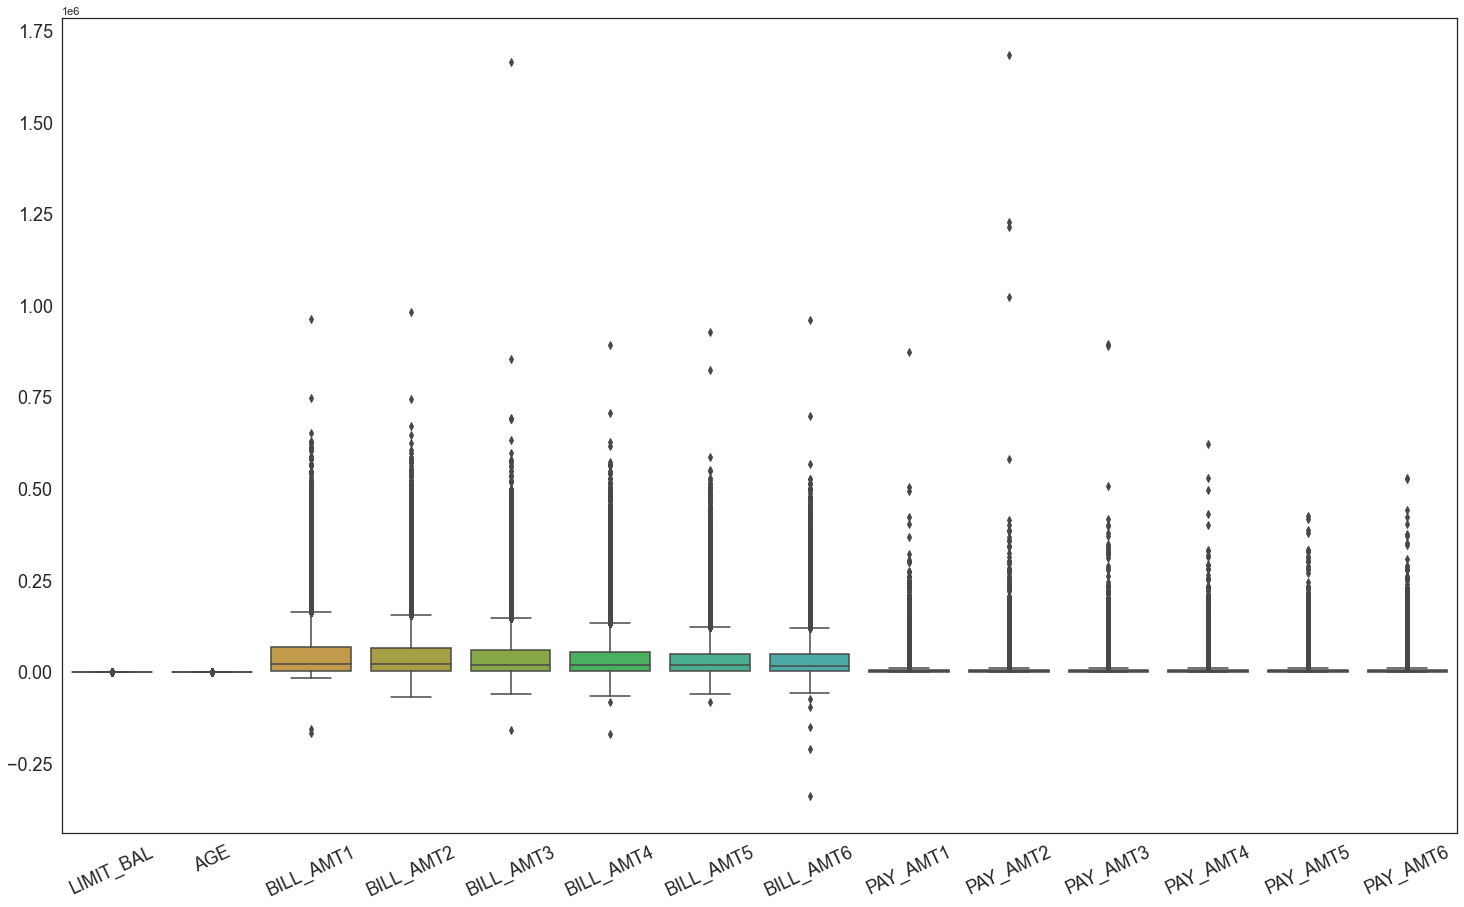

In [39]:
scaler = MinMaxScaler()
df_original['LIMIT_BAL'] = scaler.fit_transform(df_original['LIMIT_BAL'].values.reshape(-1,1))
df_original['AGE'] = scaler.fit_transform(df_original['AGE'].values.reshape(-1,1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df_original["PAY_" + str(i)] = scaler.fit_transform(df_original['PAY_' + str(i)].values.reshape(-1,1))
    
for i in range(1,7):
    scaler = MinMaxScaler()
    df_original['PAY_' + str(i)] = scaler.fit_transform(df_original['BILL_AMT' + str(i)].values.reshape(-1,1))
    
for i in range(1,7):
    scaler = MinMaxScaler()
    df_original['PAY_' + str(i)] = scaler.fit_transform(df_original['PAY_AMT' + str(i)].values.reshape(-1,1))
    
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=df_original[cols])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)

plt.savefig("FIG - BOXPLOT")
    

In [40]:
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
    df_original[att] = df_original[att].astype('category')

#one-hot enconding
data = pd.concat([pd.get_dummies(df_original['SEX'], prefix='SEX'),
                 pd.get_dummies(df_original['EDUCATION'], prefix='EDUCATION'),
                 pd.get_dummies(df_original['MARRIAGE'], prefix='MARRIAGE'),
                 df_original], axis=1)

data.drop(['EDUCATION'], axis=1, inplace=True)
data.drop(['SEX'], axis=1, inplace=True)
data.drop(['MARRIAGE'], axis=1, inplace=True)

data.head()

,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,0,1,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,0,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,0,1,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
y = data.Default
X = data.drop('Default', axis=1, inplace=False)

In [42]:
print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of attributes", X.shape[1])

(30000, 34)
Number of samples: 30000
Number of attributes 34


In [43]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

In [44]:
print(np.shape(X_train_val))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {len(y_train_val[y_train_val==0])}")
print(f" + defaulters (y=1): {len(y_train_val[y_train_val==1])}")

print("Test set:")
print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f"+ defaulters (y=1): {len(y_test[y_test==1])}")


(22500, 34)
(7500, 34)
Training set:
 + Non-defaulters (y=0): 17523
 + defaulters (y=1): 4977
Test set:
 + Non-defaulters (y=0): 5841
+ defaulters (y=1): 1659


In [45]:
if FEATURE_SELECTION:
    # remove features with correlation coeficiente >= 0.93
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.column if any(upper[columns] >= 0.92)]
    print(to_drop)
    data = data.drop(data[to_drop], axis=1)

Actual number of components: 34


C:\Users\luiz.torres\AppData\Local\Temp\ipykernel_15272\2686819420.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="major", axis="both")


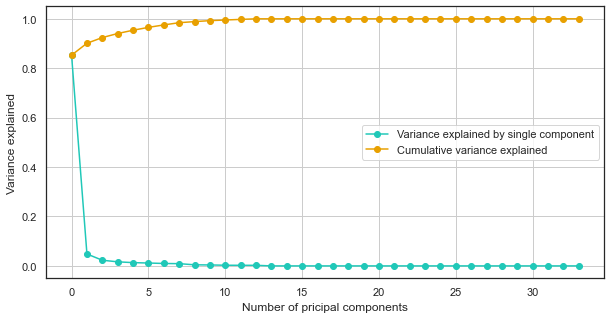

In [46]:
from sklearn.decomposition import PCA

print(f"Actual number of components: {len(X_train_val.columns.values)}")

n_pc = len(X_train_val.columns.values)

pca = PCA(n_components=n_pc)
pca.fit(X_train_val)

fig=plt.figure(1, figsize=(10,5))
plt.grid(b=True, which="major", axis="both")
plt.plot(pca.explained_variance_ratio_, marker='o', color='#20c8b8')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='#e8a000')
plt.legend(["Variance explained by single component", "Cumulative variance explained"])
plt.xlabel("Number of pricipal components")
plt.ylabel("Variance explained")
plt.savefig("PCA")

In [47]:
n_pc = 12
pca = PCA(n_components=n_pc)
pca.fit(X_train_val)
X_12d_train_val = pd.DataFrame(pca.transform(X_train_val))
X_12d_test = pd.DataFrame(pca.transform(X_test))
X_12d_train_val.columns = ['PC' + str(i) for i in range(1, n_pc+1)]
X_12d_test.columns = ['PC' + str(i) for i in range(1, n_pc+1)]
X_12d_train_val.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-109400.833053,-945.991978,-2456.971124,-5333.056605,-1932.288989,1437.051825,379.461597,1081.864796,518.806156,-434.607327,-11406.355913,-853.283081
1,300203.425585,-263737.073001,71871.998745,-3532.573256,75227.341131,12670.994552,-9231.581681,27591.715709,-35192.819443,58801.969177,-8526.100811,46053.833379
2,-108877.214443,742.578298,-2224.309518,-5001.507758,-1770.331265,1098.187189,206.592245,232.324443,-338.654970,195.228915,-6666.646494,-310.010374
3,52165.247150,-28063.466358,-2481.041922,-4107.573118,9623.833071,-2278.364017,-1364.953954,4549.606415,2462.438957,7162.449266,11078.217182,5676.299067
4,-68201.857076,10011.304017,50405.013351,4403.199481,23639.213050,-14218.126030,306.496621,6833.025679,6969.211761,-13254.315671,14206.317208,7343.088221


In [48]:
APPLY_PCA = False

if APPLY_PCA:
    X_train_val = X_12d_train_val
    X_test = X_12d_test
    print(X_12d_train_val.shape)
    print(X_12d_test.shape)

print(f"PCA APPLIED: {APPLY_PCA}")
print(X_train_val.shape)
print(X_test.shape)

PCA APPLIED: False
(22500, 34)
(7500, 34)


In [49]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline

import sklearn.ensemble
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

ALGORITHM = 'LogisticRegression' # 'RandomForest', 'LogisticRegression', 'LDA', 'KNN'
APPLY_OVERSAMPLING = False
APPLY_UNDERSAMPLING = True

if APPLY_OVERSAMPLING:
    APPLY_UNDERSAMPLING = False

if APPLY_UNDERSAMPLING:
    APPLY_OVERSAMPLING = False

In [50]:
if ALGORITHM == 'SVM' : 
    parameter_grid = {
      'C': [100, 0.1, 1, 10],
      'kernel': ['rbf', 'poly'],
      'gamma': [0.0001, 0.001, 0.01]
    }
    clf_name = 'svc__'
    classifier = SVC() # or SVC
    
elif ALGORITHM == 'RandomForest':
    parameter_grid = {
      "criterion":["gini", "entropy"],
      "max_features":[None, "sqrt"],
      "oob_score":[True],
      "n_estimators":[10, 50, 100, 200]
    }
    clf_name = 'randomforestclassifier__'
    classifier = RandomForestClassifier()
    
elif ALGORITHM == 'LogisticRegression':
    # Logistic Regression classifier
    parameter_grid = {
        "C":[0.0001, 0.001, 0.01, 0.1, 1, 10]
    }
    clf_name = 'logisticregression__'
    classifier = LogisticRegression()
    
elif ALGORITHM == 'KNN':
    # K-Nearest Neighbors classifier
    parameter_grid = {
        "n_neighbors":[500, 800, 1500, 2500, 3500, 4500]
    }
    clf_name = 'kneighborsclassifier__'
    classifier = KNeighborsClassifier() 
else :
    raise RuntimeError("Choose a correct classifier.");
    

new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}

kf = StratifiedKFold(n_splits=5, random_state=RANDOM_STATE)

if APPLY_OVERSAMPLING:
    # apply oversampling on training dataset
    imba_pipeline = make_pipeline(SMOTE(random_state=RANDOM_STATE), classifier)
elif APPLY_UNDERSAMPLING:
    # TO DO
    imba_pipeline = make_pipeline(ClusterCentroids(random_state=RANDOM_STATE), classifier)
else :
    # DO NOT apply oversampling on training dataset, just the classifier
    imba_pipeline = make_pipeline(classifier)

SCORE = 'precision' # 'accuracy', 'precision', 'recall', 'f1'
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=SCORE, return_train_score=True)

grid_imba.fit(X_train_val, y_train_val)

print(f"Best configuration found for {classifier}:")
print(grid_imba.best_params_)
print(f"Val {SCORE}:   {grid_imba.best_score_}")

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

0.5441333333333334 0.4116331096196868 0.2880539499036609 0.7209162145871006



C:\Users\luiz.torres\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'normalize confusion matrix logisticregression__')

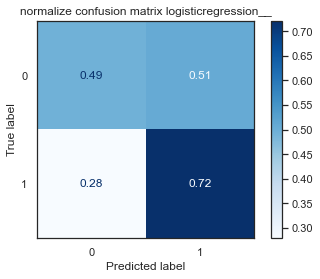

In [51]:
smote = SMOTE()
X_train_val, y_train_val = smote.fit_resample(X_train_val, y_train_val)

clf = classifier
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy, f1, precision, recall)
print(f"")

disp = plot_confusion_matrix(clf, X_test, y_test,
                            cmap = plt.cm.Blues,
                            normalize = 'true')

disp.ax_.set_title(f'normalize confusion matrix {clf_name}')